In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## CARTAS

### Parámetros relevantes

- **dbfId**: El identificador de la carta que se usará para identificar su uso en los mazos.
- **playerClass**: La clase a la que corresponde la carta (puede ser neutral o cualquiera de las 9 clases disponibles).
- **race**: Raza del esbirro (ej: 'ELEMENTAL', 'MECH', 'MURLOC').
- **rarity**: Rareza de la carta: ['FREE','COMMON','RARE','EPIC','LEGENDARY']



In [2]:
#Leemos el JSON de las cartas
df_cards = pd.read_json("Data/cards.json")

In [3]:
#Eliminamos los parámetros no relevantes
df_cards.drop('artist', axis=1, inplace=True) #Nombre del artista
df_cards.drop('flavor', axis=1, inplace=True) #Descripción de la carta en la colección
df_cards.drop('referencedTags', axis=1, inplace=True) #Etiquetas referenciales
df_cards.drop('elite', axis=1, inplace=True) #Bandera que indica si son cartas élite o no (todas las marcadas son legendarias)
df_cards.drop('id', axis=1, inplace=True) #Id por set (no se usa en los mazos)
df_cards.drop('hideStats', axis=1, inplace=True) #Bandera que define si se muestra la salud y el ataque
df_cards.drop('howToEarn', axis=1, inplace=True) #Descripción de cómo ganar una a dos copias de la carta
df_cards.drop('howToEarnGolden', axis=1, inplace=True) #Descripción de cómo ganar una a dos copias de la carta en dorado
df_cards.drop('faction', axis=1, inplace=True) #¿El personaje simpatiza con la Alianza o la Horda?
df_cards.drop('targetingArrowText', axis=1, inplace=True) #Texto que aparece cuando se va a seleccionar un objetivo
df_cards.drop('overload', axis=1, inplace=True) #Sobrecarga (cristales de maná bloquedos para el siguiente turno. Se sobreen-
                                                #tiende en el texto)
df_cards.drop('collectionText', axis=1, inplace=True) #Texto alternativo
df_cards.drop('playRequirements', axis=1, inplace=True) #Requisitos para jugar la carta
df_cards.drop('classes', axis=1, inplace=True) #Caso para las cartas tri-clase
df_cards.drop('multiClassGroup', axis=1, inplace=True) #Caso para las cartas tri-clase
df_cards.drop('entourage', axis=1, inplace=True)
#df_cards.drop('collectible', axis=1, inplace=True) #Bandera que define si la carta es coleccionable. Se sobreentiende
df_cards.drop('attack', axis=1, inplace=True) #
df_cards.drop('health', axis=1, inplace=True) #
df_cards.drop('durability', axis=1, inplace=True) #
df_cards.drop('spellDamage', axis=1, inplace=True) #
df_cards.drop('text', axis=1, inplace=True) #

df_cards.rename(columns={'dbfId':'id'}, inplace=True)
df_cards['id'].fillna(0, inplace=True) #Eliminar después
df_cards['id'] = df_cards['id'].astype(int)
df_cards['cost'].fillna(0, inplace=True)
df_cards['cost'] = df_cards['cost'].astype(int)
df_cards['collectible'].fillna(False, inplace=True)
df_cards['collectible'] = df_cards['collectible'].astype(bool)

#Actualizamos el índice de cada registro
df_cards.index = np.arange(0, len(df_cards))
#Eliminamos los parámetros que tienen pocos valores, a excepción de algunos muy relevantes
print(df_cards.info())
df_cards.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 0 to 3116
Data columns (total 11 columns):
cardClass      3114 non-null object
collectible    3117 non-null bool
cost           3117 non-null int32
id             3117 non-null int32
mechanics      1061 non-null object
name           3116 non-null object
playerClass    3114 non-null object
race           435 non-null object
rarity         1598 non-null object
set            3116 non-null object
type           3116 non-null object
dtypes: bool(1), int32(2), object(8)
memory usage: 246.6+ KB
None


,cardClass,collectible,cost,id,mechanics,name,playerClass,race,rarity,set,type
0,NEUTRAL,True,4,2518,NaN,Crowd Favorite,NEUTRAL,NaN,EPIC,TGT,MINION
1,NEUTRAL,False,6,1769,NaN,Ben Thompson,NEUTRAL,NaN,LEGENDARY,CREDITS,MINION
2,NEUTRAL,False,0,10081,NaN,Deviate Switch,NEUTRAL,NaN,NaN,TB,ENCHANTMENT
3,WARRIOR,True,3,40569,[BATTLECRY],Grimestreet Pawnbroker,WARRIOR,NaN,RARE,GANGS,MINION
4,NEUTRAL,True,4,1370,NaN,Oasis Snapjaw,NEUTRAL,BEAST,FREE,CORE,MINION


## MAZOS

### Parámetros relevantes

In [4]:
#Leemos el CSV de las mazos
df_decks = pd.read_csv('Data/decks.csv')

In [5]:
#Sólo nos interesan los mazos de formato normal (sólo Estándar y Salvaje)
df_decks = df_decks[(df_decks.deck_type == 'Ranked Deck') | (df_decks.deck_type == 'Tournament')]
df_decks = df_decks[df_decks.deck_format == 'S']

In [6]:
#Eliminamos los parámetros no relevantes
df_decks.drop('deck_type', axis=1, inplace=True) #Tipo de mazo. Todos son mazos competitivos
df_decks.drop('deck_format', axis=1, inplace=True) #Tipo de formato de juego. Todos son mazos estándar
df_decks.drop('deck_id', axis=1, inplace=True) #Id del mazo. No es relevante
df_decks.drop('date', axis=1, inplace=True) #Fecha de subida del mazo. No es relevante.
df_decks.drop('user', axis=1, inplace=True) #Usuario del mazo
#df_decks.drop('title', axis=1, inplace=True) #Nombre del mazo del mazo
df_decks.drop('rating', axis=1, inplace=True) #Puntuación del mazo

#Comentar esto más tarde
df_decks = df_decks[df_decks.deck_archetype != 'Unknown']

#Actualizamos el índice de cada registro
df_decks.index = np.arange(0, len(df_decks))

print(df_decks.info())
df_decks.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80617 entries, 0 to 80616
Data columns (total 35 columns):
craft_cost        80617 non-null int64
deck_archetype    80617 non-null object
deck_class        80617 non-null object
deck_set          80617 non-null object
title             80617 non-null object
card_0            80617 non-null int64
card_1            80617 non-null int64
card_2            80617 non-null int64
card_3            80617 non-null int64
card_4            80617 non-null int64
card_5            80617 non-null int64
card_6            80617 non-null int64
card_7            80617 non-null int64
card_8            80617 non-null int64
card_9            80617 non-null int64
card_10           80617 non-null int64
card_11           80617 non-null int64
card_12           80617 non-null int64
card_13           80617 non-null int64
card_14           80617 non-null int64
card_15           80617 non-null int64
card_16           80617 non-null int64
card_17           80617 non-n

,craft_cost,deck_archetype,deck_class,deck_set,title,card_0,card_1,card_2,card_3,card_4,...,card_20,card_21,card_22,card_23,card_24,card_25,card_26,card_27,card_28,card_29
0,7980,Fatigue Mage,Mage,Explorers,K-DOG's Malygos Fatigue Mage: Wrecker of Contr...,138,138,172,172,395,...,1016,2262,2874,2875,2901,2901,2949,36111,39225,39840
1,1480,Mill Rogue,Rogue,Explorers,Mill Rogue Revived! (K-DOG),180,180,196,196,365,...,2291,2304,2304,2704,2883,2949,2951,38578,39313,39491
2,8120,Miracle Rogue,Rogue,Explorers,Standard Miracle Rogue,180,180,306,459,461,...,1117,1158,1158,268,268,1651,2884,2884,38403,38578
3,16220,Midrange Shaman,Shaman,Explorers,[SF] Reno Shaman (my variation),189,238,505,581,629,...,2620,2736,2883,2890,2948,38263,38534,38888,39225,39694
4,6920,Miracle Rogue,Rogue,Explorers,standard format miracle rogue,180,180,306,459,461,...,1158,268,268,1651,1651,2262,2884,2884,38403,38876


In [7]:
#Hay algunas cartas cuyo nombre coincide con algunas cartas de aventuras, que accidentalmente heredaron el ID de las no coleccio-
#nales, por lo que debemos buscarlas y reemplazarlas con sus verdaderos IDs

def replace_ambiguities():
    print('Processing',len(df_decks))
    for i in range(1000):
    #for i in range(len(df_decks)):
        deckRow = (df_decks.iloc[[i]].values.tolist())[0]
        #print(deckRow)
        #if i % 1000 == 0:
            #print('Indexing', i)
        for h in range(30):
            cardRow = (df_cards[df_cards.id == deckRow[h+5]].values.tolist())[0][1:6]
            if cardRow[0] != True:
                print('In', i+1,'we found',cardRow)
                listCoincidence = (df_cards[(df_cards.name == cardRow[4]) & (df_cards.collectible == True)].values.tolist())[0][3]
                #Reemplazar en todo el dataframe
                for k in range(30):
                    column = 'card_' + str(k)
                    df_decks[column] = df_decks[column].replace(cardRow[2], listCoincidence)
                deckRow = (df_decks.iloc[[i]].values.tolist())[0]
                print('Coincidence with',listCoincidence)

%time replace_ambiguities()

Processing 80617
In 7 we found [False, 1, 40402, nan, 'Evolve']
Coincidence with 38266
In 9 we found [False, 0, 137, nan, 'Wrath']
Coincidence with 836
In 11 we found [False, 5, 38319, ['CHARGE', 'TAUNT'], 'Druid of the Claw']
Coincidence with 692
In 23 we found [False, 10, 41609, ['TAUNT', 'InvisibleDeathrattle'], 'Nefarian']
Coincidence with 2261
In 72 we found [False, 0, 38113, nan, 'Raven Idol']
Coincidence with 13335
In 84 we found [False, 0, 1161, nan, 'Starfall']
Coincidence with 86
In 84 we found [False, 3, 2310, nan, 'Druid of the Flame']
Coincidence with 2292
In 277 we found [False, 0, 40341, nan, 'Cleave']
Coincidence with 940
In 501 we found [False, 0, 468, nan, 'Mark of Nature']
Coincidence with 151
Wall time: 17.6 s


In [8]:
#Archeotypes generalization and filter
df_decks['deck_archetype'] = df_decks['deck_archetype'].str.replace(r"Druid|Hunter|Mage|Paladin|Priest|Rogue|Shaman|Warrior|Warlock|Pally|adin|lock|Worgen", "").str.strip()
df_decks['deck_archetype'].value_counts()

Control          9751
Midrange         8277
Reno             7929
N'Zoth           6220
Dragon           5423
C'Thun           4008
Tempo            3710
Aggro            3451
Jade Lotus       3213
Miracle          2899
Ramp             2844
Yogg             2507
Zoo              2337
Pirate           1843
Murloc           1653
Beast            1514
Secrets          1486
Freeze           1375
Malygos          1229
Discard          1148
Hand              895
Patron            742
Fatigue           686
Resurrect         653
Secret            644
Mill              598
Token             578
Face              561
Totem             514
Demon             453
OTK               447
Shadow            439
Maly              170
Astral            155
Mur                86
Silence            77
Randuin Wrynn      46
Edit               23
Water              23
Oil                 6
Mech                4
Name: deck_archetype, dtype: int64

In [9]:
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Reno','Control').replace('Demon','Control')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Dragon','Control').replace('Water','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Miracle','Combo').replace('OTK','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Ramp','Tempo').replace('Oil','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Yogg','Tempo').replace('Maly','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Zoo','Token').replace('Astral','Control')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Pirate','Aggro').replace('Mur','Aggro')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Murloc','Token').replace('Silence','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Beast','Midrange').replace('Randuin Wrynn','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Secrets','Tempo').replace('Totem','Token')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Freeze','Tempo').replace('Jade Lotus','Midrange')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Malygos','Combo').replace('Shadow','Control')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Discard','Midrange').replace('Edit','Unknown')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Hand','Control').replace('Mech','Tempo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Fatigue','Control').replace('Mech','Tempo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Resurrect','Control').replace('N\'Zoth','Control')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Secret','Tempo').replace('C\'Thun','Control')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Mill','Tempo').replace('Token','Midrange')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Face','Aggro').replace('Patron','Control')
df_decks.drop('title', axis=1, inplace=True)

df_decks.head()
df_decks['deck_archetype'].value_counts()

Control     37354
Midrange    19234
Tempo       13168
Aggro        5941
Combo        4897
Unknown        23
Name: deck_archetype, dtype: int64

In [10]:
#Esto se hace al final
#Sólo nos interesan las cartas jugables (no las que aparecen en los créditos o las disponibles sólo en modo aventura)
df_cards = df_cards[df_cards.collectible == True]
df_cards.drop('collectible', axis=1, inplace=True) #Bandera que define si la carta es coleccionable. Se sobreentiende

In [11]:
df_cards.head()

,cardClass,cost,id,mechanics,name,playerClass,race,rarity,set,type
0,NEUTRAL,4,2518,NaN,Crowd Favorite,NEUTRAL,NaN,EPIC,TGT,MINION
3,WARRIOR,3,40569,[BATTLECRY],Grimestreet Pawnbroker,WARRIOR,NaN,RARE,GANGS,MINION
4,NEUTRAL,4,1370,NaN,Oasis Snapjaw,NEUTRAL,BEAST,FREE,CORE,MINION
9,PRIEST,3,1363,NaN,Shadow Word: Death,PRIEST,NaN,FREE,CORE,SPELL
10,NEUTRAL,3,2579,"[DIVINE_SHIELD, STEALTH]",Silent Knight,NEUTRAL,NaN,COMMON,TGT,MINION


In [12]:
df_decks.head()

,craft_cost,deck_archetype,deck_class,deck_set,card_0,card_1,card_2,card_3,card_4,card_5,...,card_20,card_21,card_22,card_23,card_24,card_25,card_26,card_27,card_28,card_29
0,7980,Control,Mage,Explorers,138,138,172,172,395,395,...,1016,2262,2874,2875,2901,2901,2949,36111,39225,39840
1,1480,Tempo,Rogue,Explorers,180,180,196,196,365,365,...,2291,2304,2304,2704,2883,2949,2951,38578,39313,39491
2,8120,Combo,Rogue,Explorers,180,180,306,459,461,461,...,1117,1158,1158,268,268,1651,2884,2884,38403,38578
3,16220,Midrange,Shaman,Explorers,189,238,505,581,629,749,...,2620,2736,2883,2890,2948,38263,38534,38888,39225,39694
4,6920,Combo,Rogue,Explorers,180,180,306,459,461,461,...,1158,268,268,1651,1651,2262,2884,2884,38403,38876


In [13]:
#Copying the dataframes as a checkpoint
df2_cards = df_cards.copy()
df2_decks = (df_decks.copy())[0:1000]
#df2_decks = df_decks.copy()

In [14]:
def statics_deck(test):
    minion, spell, weapon, hero, avgDeck = 0,0,0,0,0
    #print(test)
    for h in range(30):
        #print(test[h+4])
        cardRow = (df2_cards[df2_cards.id == test[h+4]].values.tolist())[0]
        #print(cardRow)
        avgDeck += cardRow[1]
        if cardRow[9] == 'MINION':
            minion += 1
        elif cardRow[9] == 'SPELL':
            spell += 1
        elif cardRow[9] == 'WEAPON':
            weapon += 1
        elif cardRow[9] == 'HERO':
            hero += 1
    avgDeck = float(avgDeck)
    avgDeck /= 30
    return minion, spell, weapon, hero, avgDeck

In [15]:
arrM, arrS, arrW, arrH, arrAvg = [],[],[],[],[]

def general_statics():
    for i in range(1000):
    #for i in range(len(df2_decks)):
        #if i % 500 == 0:
        #    print('Indexing',i)
        #Set as integer
        prueba = (df2_decks.iloc[[i]].values.tolist())[0]
        #print(prueba)
        prueba[0] = int(prueba[0])
        for j in range(30):
            prueba[j+4] = int(prueba[j+4])
        contMin, contSpell, contWeap, contHero, avg = statics_deck(prueba)
        #print(contMin, contSpell, contWeap, contHero, avg)
        arrM.append(contMin)
        arrS.append(contSpell)
        arrW.append(contWeap)
        arrH.append(contHero)
        arrAvg.append(avg)

%time general_statics()

Wall time: 15.7 s


In [16]:
#NO TOCAR HASTA PREVIO AVISO

print(len(arrAvg), len(arrM), len(arrS), len(arrW), len(arrH))
df2_decks['avg_mana'] = arrAvg
df2_decks['nminions'] = arrM
df2_decks['nspells'] = arrS
df2_decks['nweapons'] = arrW
df2_decks['nheroes'] = arrH

print(df2_decks.info())
df2_decks.head()

1000 1000 1000 1000 1000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 39 columns):
craft_cost        1000 non-null int64
deck_archetype    1000 non-null object
deck_class        1000 non-null object
deck_set          1000 non-null object
card_0            1000 non-null int64
card_1            1000 non-null int64
card_2            1000 non-null int64
card_3            1000 non-null int64
card_4            1000 non-null int64
card_5            1000 non-null int64
card_6            1000 non-null int64
card_7            1000 non-null int64
card_8            1000 non-null int64
card_9            1000 non-null int64
card_10           1000 non-null int64
card_11           1000 non-null int64
card_12           1000 non-null int64
card_13           1000 non-null int64
card_14           1000 non-null int64
card_15           1000 non-null int64
card_16           1000 non-null int64
card_17           1000 non-null int64
card_18           1000 non-nul

,craft_cost,deck_archetype,deck_class,deck_set,card_0,card_1,card_2,card_3,card_4,card_5,...,card_25,card_26,card_27,card_28,card_29,avg_mana,nminions,nspells,nweapons,nheroes
0,7980,Control,Mage,Explorers,138,138,172,172,395,395,...,2901,2949,36111,39225,39840,3.733333,15,15,0,0
1,1480,Tempo,Rogue,Explorers,180,180,196,196,365,365,...,2949,2951,38578,39313,39491,2.600000,12,18,0,0
2,8120,Combo,Rogue,Explorers,180,180,306,459,461,461,...,1651,2884,2884,38403,38578,2.566667,13,17,0,0
3,16220,Midrange,Shaman,Explorers,189,238,505,581,629,749,...,38263,38534,38888,39225,39694,4.033333,19,10,1,0
4,6920,Combo,Rogue,Explorers,180,180,306,459,461,461,...,2262,2884,2884,38403,38876,2.633333,15,15,0,0


In [17]:
#Checkpoint approved
df_cards = df2_cards.copy()
df_decks = df2_decks.copy()
#2nd. Checkpoint

### Discretización

In [18]:
#Ya no necesitamos los id de las cartas
for i in range(30):
    df_decks.drop(df_decks.columns[4], axis=1, inplace=True)
df_decks.drop("deck_set", axis=1, inplace=True)
df_decks.drop("nheroes", axis=1, inplace=True) #En 2016 no existían cartas héroe

In [19]:
colec_classes = df_decks[['deck_class']].drop_duplicates().sort_values('deck_class')
colec_classes.index = np.arange(0, 9)

colec_classes

,deck_class
0,Druid
1,Hunter
2,Mage
3,Paladin
4,Priest
5,Rogue
6,Shaman
7,Warlock
8,Warrior


In [20]:
cat_dict = colec_classes.to_dict()

cat_dict

{'deck_class': {0: 'Druid',
  1: 'Hunter',
  2: 'Mage',
  3: 'Paladin',
  4: 'Priest',
  5: 'Rogue',
  6: 'Shaman',
  7: 'Warlock',
  8: 'Warrior'}}

In [21]:
#Transformando las clases en categorías
for n,col in df_decks.items():
    if not pd.api.types.is_numeric_dtype(col) and n != 'deck_archetype':
        # Transforma la variable a tipo category
        df_decks[n] = col.astype('category')

        # Actualiza cat_dict
        cat_dict[n] = {i:e for i,e in enumerate(df_decks[n].cat.categories)}

for n,col in df_decks.items():
    if pd.api.types.is_categorical_dtype(col):
        df_decks[n] = col.cat.codes+1

In [22]:
df_decks.head(7)

,craft_cost,deck_archetype,deck_class,avg_mana,nminions,nspells,nweapons
0,7980,Control,3,3.733333,15,15,0
1,1480,Tempo,6,2.600000,12,18,0
2,8120,Combo,6,2.566667,13,17,0
3,16220,Midrange,7,4.033333,19,10,1
4,6920,Combo,6,2.633333,15,15,0
5,4400,Combo,6,3.200000,16,14,0
6,4040,Control,7,3.200000,18,11,1


### Entrenamiento (Random Forest)

In [23]:
from sklearn.model_selection import train_test_split

x = df_decks.drop('deck_archetype', axis=1)
y = df_decks['deck_archetype']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

Train shape     : (800, 6)
Validation shape: (200, 6)


In [24]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=50, n_jobs=-1, oob_score=True, min_samples_split=5)
m.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [25]:
def score():
    print(f'Scores:')
    print(f'Train      = {m.score(x_train, y_train):.4}')
    print(f'Validation = {m.score(x_val, y_val):.4}')
    if hasattr(m, 'oob_score_'): print(f'OOB        = {m.oob_score_:.4}')
    
score()    

Scores:
Train      = 0.9637
Validation = 0.84
OOB        = 0.845


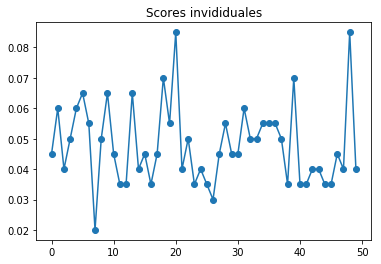

In [26]:
from sklearn.metrics import accuracy_score

preds = np.stack([t.predict(x_val) for t in m.estimators_])
accs = [accuracy_score(y_val=='Control', p) for p in preds]
plt.plot(accs, '-o')
plt.title('Scores invididuales');

In [27]:
# Usemos los árboles para obtener una predicción con una estimación de confianza.
sample = x_val.sample(1)

pred = np.stack([t.predict(sample) for t in m.estimators_])

pred.mean(), pred.mean() > 0.5, pred.std()

(1.78, True, 1.2851459061133876)

In [28]:
targered = pd.factorize(df_decks['deck_archetype'])[0]

targered[0:15]

array([0, 1, 2, 3, 2, 2, 0, 3, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

**PD:** Estamos evaluando en usar redes neuronales